<a href="https://colab.research.google.com/github/samanthastaheli/cse450_module2/blob/main/LearningModelSingleTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model Document

## Import Pandas and the Data Set

In [ ]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

## View Dataframe Info

In [ ]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

## Import Libraries

In [ ]:
# Model using poutcome, job, and marital
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Select Features for the Training

In [ ]:
features = ["job"]

## Drop NA and Prepare X and y

In [ ]:
campaign = campaign.dropna()
X = pd.get_dummies(campaign[features], drop_first=True)
y = campaign["y"]

## Balance the Data Set

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
X_new, y_new = ro.fit_resample(X, y)

## Split into the Train and Test sets and Build the Tree


In [ ]:
# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20)

# Build the decision tree
clf = DecisionTreeClassifier(max_depth=9, min_samples_leaf=100)

## Train the Model

In [ ]:
# Train it
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100)

## Test the Model

In [ ]:
# Test it 
clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)

## The Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


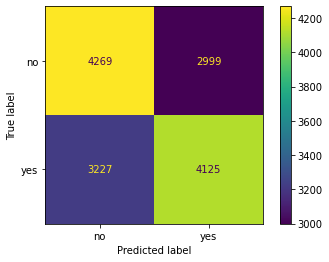

In [ ]:
from sklearn import metrics
metrics.plot_confusion_matrix(clf, X_test, y_test)

## View Stats

In [ ]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

          no       0.57      0.59      0.58      7268
         yes       0.58      0.56      0.57      7352

    accuracy                           0.57     14620
   macro avg       0.57      0.57      0.57     14620
weighted avg       0.57      0.57      0.57     14620



## View the Tree

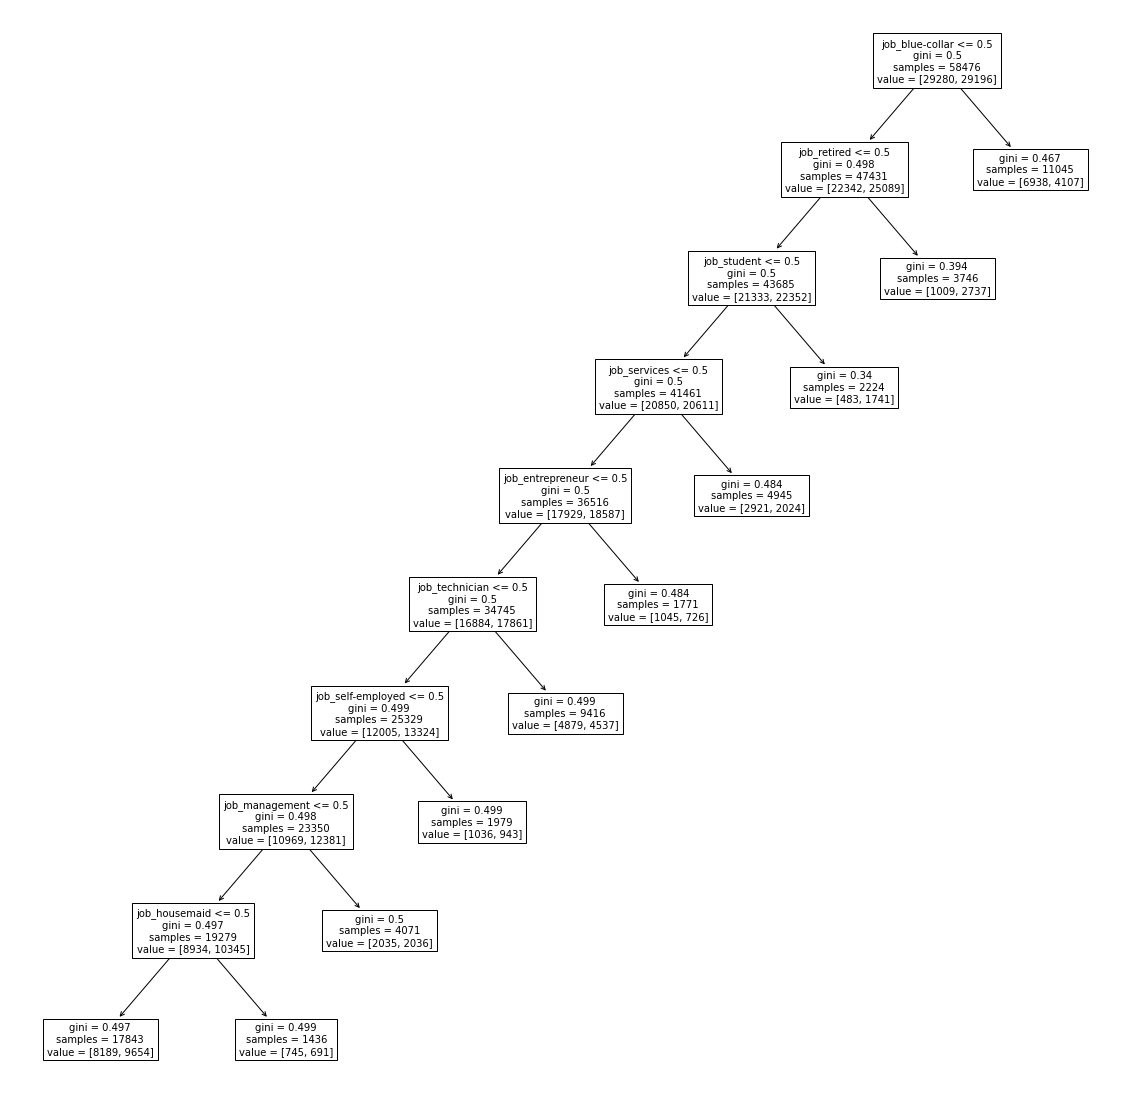

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()